# Exploratory Model Analysis


In [1]:
import grama as gr
import numpy as np
import pandas as pd
from sklearn.gaussian_process.kernels import Kernel, RBF, ConstantKernel as Con

DF = gr.Intention()
%matplotlib inline
np.random.seed(101)

# Custom boat analysis tools
from boats import *

# Setup

## Load the data


In [2]:
filename = "data/stability-data.csv"
df_raw = pd.read_csv(filename)
df_raw

,d,n,f_com,H,W,M_max,mass,dMdtheta_avs,dMdtheta_0,M_min,BM,angle,int_M_stable,GM
0,0.414694,0.969522,0.384112,1.931260,1.390651,5.004726e-16,0.019592,NaN,-1.459991,-4.952630e+00,0.108234,NaN,-8.019885,0.193949
1,0.242507,1.195436,0.656740,2.713299,3.580954,7.277457e+00,0.046730,NaN,9.916728,-5.402567e+00,0.425216,NaN,3.675911,-0.557773
2,0.441223,0.936345,0.672138,1.446188,3.744617,6.550768e+00,0.040910,8.237037,-11.668754,-5.879390e+00,1.073773,1.617128,-5.681558,0.768485
3,0.689483,0.882652,0.648739,1.210221,2.530339,1.149756e+00,0.034526,2.380926,-8.409095,-2.228434e+00,0.764303,1.509121,-2.070254,0.652657
4,0.497305,0.780804,0.235978,2.502149,1.505777,7.886234e-16,0.029039,NaN,-8.644337,-1.401972e+01,0.103794,NaN,-25.533024,0.796536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.277591,0.562650,0.893968,2.662832,3.030807,5.471222e+00,0.028587,NaN,9.738265,-6.066334e-16,0.233400,NaN,11.236121,-0.907202
996,0.406322,1.403215,0.243989,1.820171,1.337757,6.824626e-16,0.021281,NaN,-2.759760,-6.680056e+00,0.113371,NaN,-11.439189,0.366400
997,0.607333,0.636330,0.390791,1.504778,3.372128,1.289096e-15,0.044168,NaN,-24.322574,-9.742923e+00,1.100546,NaN,-17.504023,1.399712
998,0.622833,0.751532,0.386794,2.306757,2.632218,1.910895e-15,0.059512,NaN,-19.836982,-1.574321e+01,0.424443,NaN,-34.614643,0.877600


## Wrangle the data


In [3]:
df_boats = (
    df_raw
    >> gr.tf_mutate(
        stability=-DF.dMdtheta_0 / DF.mass,
        angle=gr.case_when(
            [gr.is_nan(DF.angle) & (DF.dMdtheta_0 < 0),                  180],
            [gr.is_nan(DF.angle) & (DF.dMdtheta_0 > 0),                    0],
            [                                     True, DF.angle * 180/np.pi],
        )
    )
)

df_boats

,d,n,f_com,H,W,M_max,mass,dMdtheta_avs,dMdtheta_0,M_min,BM,angle,int_M_stable,GM,stability
0,0.414694,0.969522,0.384112,1.931260,1.390651,5.004726e-16,0.019592,NaN,-1.459991,-4.952630e+00,0.108234,180.000000,-8.019885,0.193949,74.519812
1,0.242507,1.195436,0.656740,2.713299,3.580954,7.277457e+00,0.046730,NaN,9.916728,-5.402567e+00,0.425216,0.000000,3.675911,-0.557773,-212.215489
2,0.441223,0.936345,0.672138,1.446188,3.744617,6.550768e+00,0.040910,8.237037,-11.668754,-5.879390e+00,1.073773,92.654593,-5.681558,0.768485,285.230889
3,0.689483,0.882652,0.648739,1.210221,2.530339,1.149756e+00,0.034526,2.380926,-8.409095,-2.228434e+00,0.764303,86.466261,-2.070254,0.652657,243.556979
4,0.497305,0.780804,0.235978,2.502149,1.505777,7.886234e-16,0.029039,NaN,-8.644337,-1.401972e+01,0.103794,180.000000,-25.533024,0.796536,297.684552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.277591,0.562650,0.893968,2.662832,3.030807,5.471222e+00,0.028587,NaN,9.738265,-6.066334e-16,0.233400,0.000000,11.236121,-0.907202,-340.654998
996,0.406322,1.403215,0.243989,1.820171,1.337757,6.824626e-16,0.021281,NaN,-2.759760,-6.680056e+00,0.113371,180.000000,-11.439189,0.366400,129.679332
997,0.607333,0.636330,0.390791,1.504778,3.372128,1.289096e-15,0.044168,NaN,-24.322574,-9.742923e+00,1.100546,180.000000,-17.504023,1.399712,550.683211
998,0.622833,0.751532,0.386794,2.306757,2.632218,1.910895e-15,0.059512,NaN,-19.836982,-1.574321e+01,0.424443,180.000000,-34.614643,0.877600,333.327660


In [4]:
md_performance = (
    gr.Model("Boat Performance Characteristics")
    >> gr.cp_function(
        fun=fun_performance,
        var=["H", "W", "n", "d", "f_com"],
        out=[
            "mass",
            "BM",
            "GM",
            "angle",
            "dMdtheta_0",
            "dMdtheta_avs", 
            "M_max", 
            "M_min", 
            "int_M_stable",
        ]
    )
    >> gr.cp_marginals(
        H=dict(dist="uniform", loc=1, scale=2),
        W=dict(dist="uniform", loc=1, scale=3),
        n=dict(dist="uniform", loc=0.5, scale=1.0),
        d=dict(dist="uniform", loc=0.25, scale=0.50),
        f_com=dict(dist="uniform", loc=0.10, scale=0.90),
    )
    >> gr.cp_copula_independence()
)
md_performance

model: Boat Performance Characteristics

  inputs:
    var_det:

    var_rand:
      H: (+0) uniform, {'mean': '2.000e+00', 's.d.': '5.800e-01', 'COV': 0.29, 'skew.': 0.0, 'kurt.': 1.8}
      W: (+0) uniform, {'mean': '2.500e+00', 's.d.': '8.700e-01', 'COV': 0.35, 'skew.': 0.0, 'kurt.': 1.8}
      n: (+0) uniform, {'mean': '1.000e+00', 's.d.': '2.900e-01', 'COV': 0.29, 'skew.': 0.0, 'kurt.': 1.8}
      d: (+0) uniform, {'mean': '5.000e-01', 's.d.': '1.400e-01', 'COV': 0.29, 'skew.': 0.0, 'kurt.': 1.8}
      f_com: (+0) uniform, {'mean': '5.500e-01', 's.d.': '2.600e-01', 'COV': 0.47, 'skew.': 0.0, 'kurt.': 1.8}

    copula:
      Independence copula

  functions:
      f0: ['H', 'W', 'n', 'd', 'f_com'] -> ['mass', 'BM', 'GM', 'angle', 'dMdtheta_0', 'dMdtheta_avs', 'M_max', 'M_min', 'int_M_stable']

# Diagrams

Make some diagrams to explain the fundamentals.


## Parameterization

Illustrate the design parameterization.


/Users/zach/opt/anaconda3/envs/grama/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/zach/opt/anaconda3/envs/grama/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: images/hull-schematic-upright.png


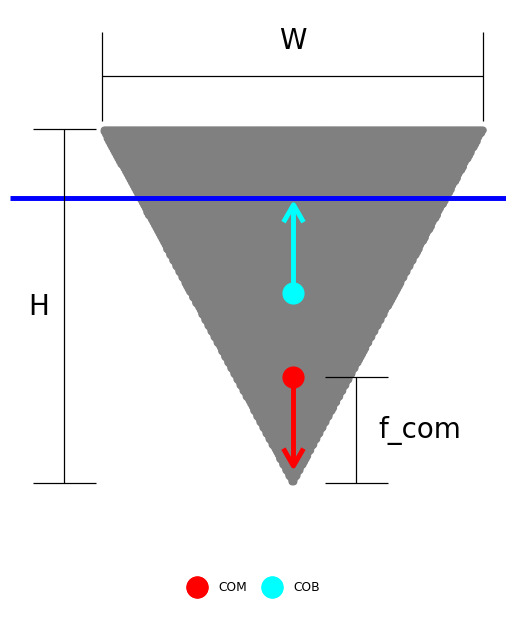

<ggplot: (8766288807072)>

In [5]:
## Set up design
X_hull = [2.0, 3.0, 1.0, 0.65, 0.3]
df_hull, df_mass = make_hull(X_hull, n_marg=500)
angle = 0
df_hull_r = hull_rotate(df_hull, df_mass, angle)
df_waterline = get_equ_waterline(df_hull, df_mass, angle)
y_waterline = float(df_waterline.y_w[0])

## Visualize
p = (
    df_hull_r
    >> gr.ggplot(gr.aes("x", "y"))
    # Hull
    + gr.geom_point(size=2, color="grey")
    # Annotation
    + gr.geom_hline(yintercept=y_waterline, color="blue", size=2)
    + gr.geom_point(
        df_mass
        >> gr.tf_mutate(source="COM"), 
        gr.aes(color="source"),
        size=8,
    )
    + gr.geom_point(
        df_waterline
        >> gr.tf_mutate(source="COB"), 
        gr.aes("x_cob", "y_cob", color="source"),
        size=8
    )
    + gr.geom_segment(
        data=df_mass
        >> gr.tf_mutate(yend=DF.y - 0.5),
        mapping=gr.aes(xend="x", yend="yend"),
        color="red",
        arrow=gr.arrow(),
        size=2,
    )
    + gr.geom_segment(
        data=df_waterline
        >> gr.tf_mutate(yend=DF.y_cob + 0.5),
        mapping=gr.aes("x_cob", "y_cob", xend="x_cob", yend="yend"),
        color="cyan",
        arrow=gr.arrow(),
        size=2,
    )
    ## Variable labels
    + gr.geom_errorbarh(
        data=gr.df_make(x=0, xmin=-1.5, xmax=+1.5, y=2.3),
        mapping=gr.aes(xmin="xmin", xmax="xmax", y="y"),
    )
    + gr.annotate(
        "text",
        x=0, y=2.5, label="W",
        size=20,
    )
    + gr.geom_errorbar(
        data=gr.df_make(x=-1.8, y=0, ymin=0, ymax=2),
        mapping=gr.aes(x="x", ymin="ymin", ymax="ymax"),
    )
    + gr.annotate(
        "text",
        x=-2.0, y=1.0, label="H",
        size=20,
    )
    + gr.geom_errorbar(
        data=gr.df_make(x=+0.5, y=0, ymin=0, ymax=0.3 * 2),
        mapping=gr.aes(x="x", ymin="ymin", ymax="ymax"),
    )
    + gr.annotate(
        "text",
        x=+1.0, y=0.3, label="f_com",
        size=20,
    )
    # Settings
    + gr.scale_color_manual(
        name=" ",
        values=dict(
            COM="red",
            COB="cyan",
        )
    )
    + gr.theme_void()
    + gr.theme(
        aspect_ratio=1,
        plot_background=gr.element_rect(color="white", fill="white"),
        legend_position="bottom",
    )
    + gr.labs()
)
p.save("images/hull-schematic-upright.png")
p

Pictured above:
- `W` is the width of the boat
- `H` is the height of the boat
- `f_com` is the vertical location of the Center of Mass (COM) of the boat
  - note that `f_com` is expressed as a fraction of the height `H`
  
Not pictured:
- `n` is the shape factor
  - this determines the "sharpness" of the bottom corner
- `d` is the displacement ratio: boat mass divided by mass of maximum water displaced
  - if `d > 1`, the boat sinks
  - if `d < 1`, the boat will float, but not necessarily upright!
  

## Stable design

Illustrate a stable design at a small heel angle


/Users/zach/opt/anaconda3/envs/grama/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/zach/opt/anaconda3/envs/grama/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: images/hull-schematic-stable.png


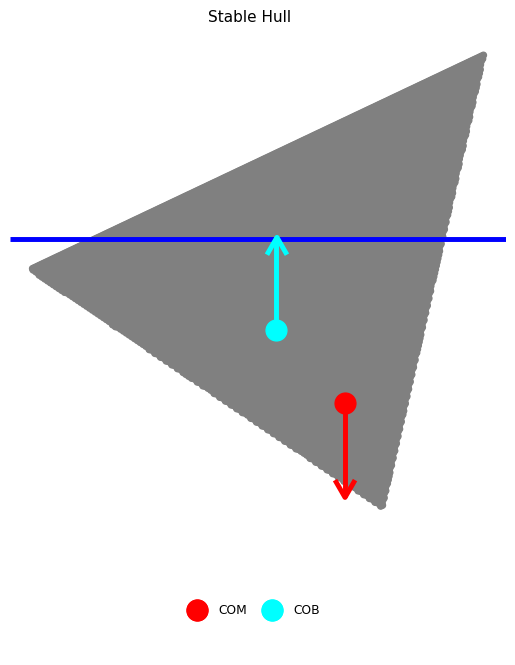

<ggplot: (8766345463037)>

In [6]:
## Set up design
X_hull = [2.0, 3.0, 1.0, 0.65, 0.3]
df_hull, df_mass = make_hull(X_hull, n_marg=500)
angle = np.pi/8
df_hull_r = hull_rotate(df_hull, df_mass, angle)
df_waterline = get_equ_waterline(df_hull, df_mass, angle)
y_waterline = float(df_waterline.y_w[0])
## Visualize
p = (
    df_hull_r
    >> gr.ggplot(gr.aes("x", "y"))
    # Hull
    + gr.geom_point(size=2, color="grey")
    # Annotation
    + gr.geom_hline(yintercept=y_waterline, color="blue", size=2)
    + gr.geom_point(
        df_mass
        >> gr.tf_mutate(source="COM"), 
        gr.aes(color="source"),
        size=8,
    )
    + gr.geom_point(
        df_waterline
        >> gr.tf_mutate(source="COB"), 
        gr.aes("x_cob", "y_cob", color="source"),
        size=8
    )
    + gr.geom_segment(
        data=df_mass
        >> gr.tf_mutate(yend=DF.y - 0.5),
        mapping=gr.aes(xend="x", yend="yend"),
        color="red",
        arrow=gr.arrow(),
        size=2,
    )
    + gr.geom_segment(
        data=df_waterline
        >> gr.tf_mutate(yend=DF.y_cob + 0.5),
        mapping=gr.aes("x_cob", "y_cob", xend="x_cob", yend="yend"),
        color="cyan",
        arrow=gr.arrow(),
        size=2,
    )
    # Settings
    + gr.scale_color_manual(
        name=" ",
        values=dict(
            COM="red",
            COB="cyan",
        )
    )
    + gr.theme_void()
    + gr.theme(
        aspect_ratio=1,
        plot_background=gr.element_rect(color="white", fill="white"),
        legend_position="bottom",
    )
    + gr.labs(title="Stable Hull")
)
p.save("images/hull-schematic-stable.png")
p

Note that the configuration of the buoyant and gravitational forces is such that rotation will tend to return the boat to upright. This is an upright-stable boat design.

## Unstable design


/Users/zach/opt/anaconda3/envs/grama/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/zach/opt/anaconda3/envs/grama/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: images/hull-schematic-unstable.png


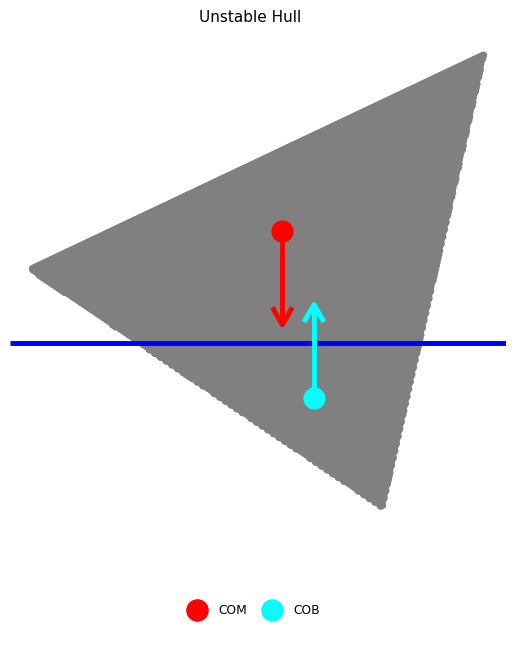

<ggplot: (8766322863267)>

In [7]:
## Set up design
X_hull = [2.0, 3.0, 1.0, 0.25, 0.8]
df_hull, df_mass = make_hull(X_hull, n_marg=500)
angle = np.pi/8
df_hull_r = hull_rotate(df_hull, df_mass, angle)
df_waterline = get_equ_waterline(df_hull, df_mass, angle)
y_waterline = float(df_waterline.y_w[0])
## Visualize
p = (
    df_hull_r
    >> gr.ggplot(gr.aes("x", "y"))
    # Hull
    + gr.geom_point(size=2, color="grey")
    # Annotation
    + gr.geom_hline(yintercept=y_waterline, color="blue", size=2)
    + gr.geom_point(
        df_mass
        >> gr.tf_mutate(source="COM"), 
        gr.aes(color="source"),
        size=8,
    )
    + gr.geom_point(
        df_waterline
        >> gr.tf_mutate(source="COB"), 
        gr.aes("x_cob", "y_cob", color="source"),
        size=8
    )
    + gr.geom_segment(
        data=df_mass
        >> gr.tf_mutate(yend=DF.y - 0.5),
        mapping=gr.aes(xend="x", yend="yend"),
        color="red",
        arrow=gr.arrow(),
        size=2,
    )
    + gr.geom_segment(
        data=df_waterline
        >> gr.tf_mutate(yend=DF.y_cob + 0.5),
        mapping=gr.aes("x_cob", "y_cob", xend="x_cob", yend="yend"),
        color="cyan",
        arrow=gr.arrow(),
        size=2,
    )
    # Settings
    + gr.scale_color_manual(
        name=" ",
        values=dict(
            COM="red",
            COB="cyan",
        )
    )
    + gr.theme_void()
    + gr.theme(
        aspect_ratio=1,
        plot_background=gr.element_rect(color="white", fill="white"),
        legend_position="bottom",
    )
    + gr.labs(title="Unstable Hull")
)
p.save("images/hull-schematic-unstable.png")
p

Note that the configuration of the buoyant and gravitational forces is such that the boat will rotate further away from upright. This is an upright-unstable design.

## Moment Curve

Find a boat that has an AVS close to 120 degrees.


In [8]:
df_close = (
    df_boats
    >> gr.tf_mutate(delta=gr.abs(DF.angle - 120))
    >> gr.tf_arrange(DF.delta)
    >> gr.tf_head()
)
df_close

,d,n,f_com,H,W,M_max,mass,dMdtheta_avs,dMdtheta_0,M_min,BM,angle,int_M_stable,GM,stability,delta
0,0.401634,0.828358,0.632386,2.080453,3.113627,2.816397,0.042640,7.080583,-1.770128,-3.582306,0.474083,120.421273,-4.714859,0.086334,41.513024,0.421273
1,0.275011,0.579313,0.482373,1.084382,2.967870,1.903384,0.011241,3.096205,-2.201174,-2.485484,0.658067,119.331364,-3.215753,0.624328,195.818503,0.668636
2,0.372088,0.973018,0.371669,1.011760,3.220170,3.371888,0.022319,6.063030,-9.983793,-5.354053,1.132030,120.790493,-7.189307,1.204475,447.313299,0.790493
3,0.318148,0.760327,0.556245,2.016580,4.135281,7.356534,0.040589,13.426707,-7.211137,-9.198032,0.703933,119.208090,-11.751978,0.442053,177.664197,0.791910
4,0.527487,1.100070,0.415718,1.133796,3.719566,4.551802,0.043495,9.471970,-27.529216,-9.431474,1.414571,118.820082,-12.544045,1.460150,632.932070,1.179918


Analyze the selected boat.


In [9]:
## Set up design
X_hull = df_close[["H", "W", "n", "d", "f_com"]].iloc[0].values
df_hull, df_mass = make_hull(X_hull, n_marg=500)
df_moment = get_moment_curve(df_hull, df_mass, num=100)
df_avs = get_avs(df_hull, df_mass)

Visualize the moment curve for the selected boat.


/Users/zach/opt/anaconda3/envs/grama/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/zach/opt/anaconda3/envs/grama/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: images/moment-curve.png


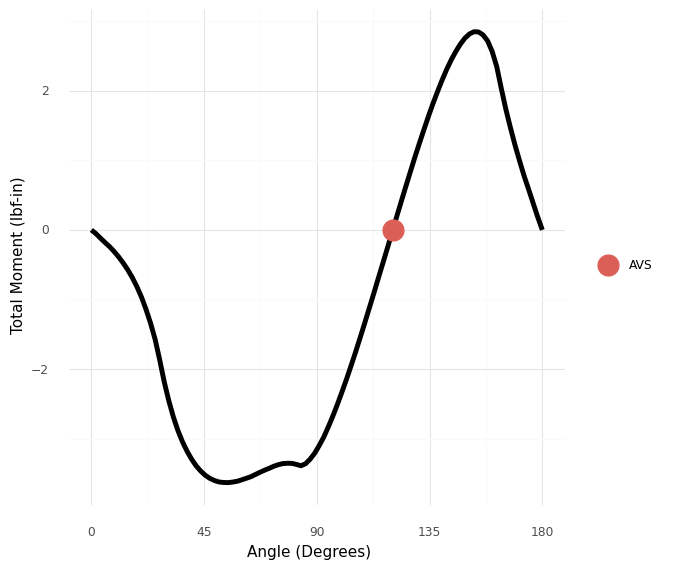

<ggplot: (8766323245216)>

In [10]:
p = (
    df_moment
    >> gr.ggplot(gr.aes("angle/np.pi*180", "M_net"))
    + gr.geom_line(size=2)
    + gr.geom_point(
        data=df_avs
        >> gr.tf_mutate(source="AVS"),
        mapping=gr.aes(color="source"),
        size=8,
    )
    + gr.scale_x_continuous(breaks=(0, 45, 90, 135, 180))
    + gr.scale_color_discrete(name=" ")
    + gr.theme_minimal()
    + gr.theme(
        aspect_ratio=1,
        plot_background=gr.element_rect(color="white", fill="white"),
        # legend_position="bottom",
    )
    + gr.labs(
        x="Angle (Degrees)",
        y="Total Moment (lbf-in)",
    )
)
p.save("images/moment-curve.png")
p

## Moment Curves: Stable and Unstable

Find a boat with a similar displacement ratio `d` to the previous case that is unstable at upright.


In [11]:
df_close_unstable = (
    df_boats
    >> gr.tf_mutate(delta=gr.abs(DF.d - 0.401634))
    >> gr.tf_filter(DF.dMdtheta_0 > 0)
    >> gr.tf_arrange(DF.delta)
    >> gr.tf_head()
)
df_close_unstable

,d,n,f_com,H,W,M_max,mass,dMdtheta_avs,dMdtheta_0,M_min,BM,angle,int_M_stable,GM,stability,delta
0,0.401102,1.139924,0.866095,1.703914,2.265563,4.087388,0.030164,NaN,5.339370,-8.796185e-16,0.325038,0.0,8.620662,-0.476983,-177.013921,0.000532
1,0.403695,1.194308,0.700761,1.358412,1.695746,0.783183,0.018144,NaN,1.529057,-7.127943e-16,0.219489,0.0,1.213877,-0.220075,-84.274715,0.002061
2,0.404316,1.427980,0.842220,2.285879,1.947480,8.447135,0.038203,NaN,13.179424,-1.273930e-15,0.187569,0.0,14.932057,-0.885303,-344.981427,0.002682
3,0.398467,1.160049,0.475661,2.601486,1.089447,0.740163,0.021928,NaN,1.264404,-6.422897e+00,0.048555,0.0,-7.391539,-0.143859,-57.662702,0.003167
4,0.405834,0.939983,0.863930,1.569447,1.692071,2.160862,0.018527,NaN,3.599100,-6.217993e-16,0.192900,0.0,4.643720,-0.498702,-194.261433,0.004200


Compute statical stability curves for both boats

In [12]:
## Set up design
X_hull = df_close[["H", "W", "n", "d", "f_com"]].iloc[0].values
df_hull, df_mass = make_hull(X_hull, n_marg=500)
df_moment_stable = get_moment_curve(df_hull, df_mass, num=100)

X_hull = df_close_unstable[["H", "W", "n", "d", "f_com"]].iloc[0].values
df_hull, df_mass = make_hull(X_hull, n_marg=500)
df_moment_unstable = get_moment_curve(df_hull, df_mass, num=100)

/Users/zach/opt/anaconda3/envs/grama/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/zach/opt/anaconda3/envs/grama/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: images/moment-curve-cf.png


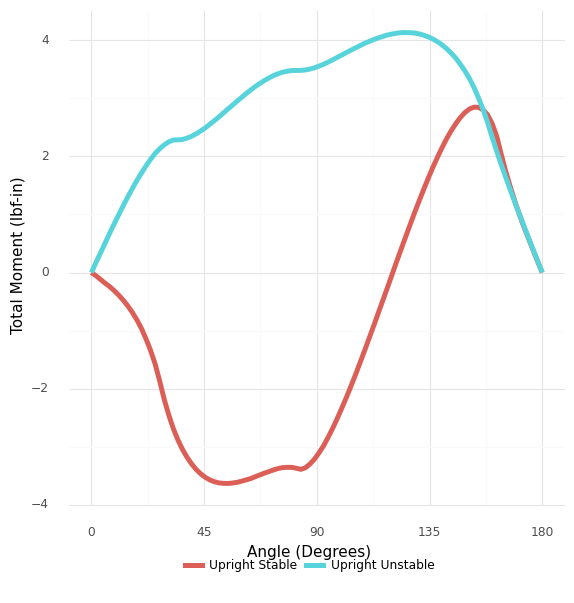

<ggplot: (8766340522379)>

In [13]:
p = (
    df_moment_stable
    >> gr.tf_mutate(source="Upright Stable")
    >> gr.tf_bind_rows(
        df_moment_unstable
        >> gr.tf_mutate(source="Upright Unstable")
    )
    
    >> gr.ggplot(gr.aes("angle/np.pi*180", "M_net"))
    + gr.geom_line(gr.aes(color="source"), size=2)
    
    + gr.scale_x_continuous(breaks=(0, 45, 90, 135, 180))
    + gr.scale_color_discrete(name=" ")
    + gr.theme_minimal()
    + gr.theme(
        aspect_ratio=1,
        plot_background=gr.element_rect(color="white", fill="white"),
        legend_position="bottom",
    )
    + gr.labs(
        x="Angle (Degrees)",
        y="Total Moment (lbf-in)",
    )
)
p.save("images/moment-curve-cf.png")
p

# EMA

## Initial EDA


In [14]:
(
    df_boats
    >> gr.tf_iocorr(
        var=["d", "n", "f_com", "H", "W"],
        out=["mass", "angle", "stability"],
    )
)

,rho,var,out
0,0.489864,d,mass
1,0.163878,d,angle
2,0.291494,d,stability
3,0.245673,n,mass
4,-0.100740,n,angle
5,-0.161713,n,stability
6,-0.005088,f_com,mass
7,-0.831327,f_com,angle
8,-0.741585,f_com,stability
9,0.489978,H,mass


Calling plot_corrtile....


/Users/zach/opt/anaconda3/envs/grama/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/zach/opt/anaconda3/envs/grama/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: images/corrtile.png


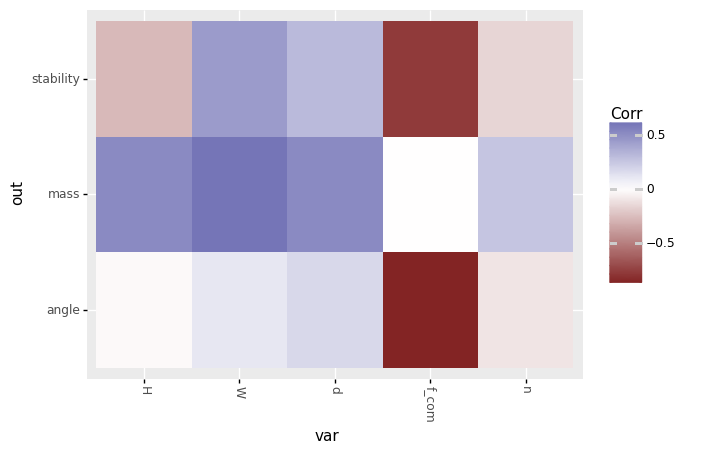

<ggplot: (8766323450082)>

In [15]:
p = (
    df_boats
    >> gr.tf_iocorr(
        var=["d", "n", "f_com", "H", "W"],
        out=["mass", "angle", "stability"],
    )
    >> gr.pt_auto()
)
p.save("images/corrtile.png")
p

## Empirical model

### Fit an empirical model

Assess the fit with k-fold cross validation.


In [16]:
## Decide on a fitting procedure
ft_common = gr.ft_gp(
    var=["d", "n", "f_com", "H", "W"],
    out=["stability", "angle"],
    kernels=dict(
        stability=None, # Use default
        angle=RBF(length_scale=0.1),
    )
)

## Apply fit in k-CV
df_kcv = (
    df_boats
    >> gr.tf_kfolds(
        ft=ft_common,
        out=["stability", "angle"],
        summaries=dict(rsq=gr.rsq),
    )
)
df_kcv.to_csv("tables/kcv.csv", index=False)
df_kcv

... tran_kfolds is using default k=5


,rsq_angle,rsq_stability,_kfold
0,0.815981,0.953013,0
1,0.792533,0.973140,1
2,0.802534,0.980385,2
3,0.773374,0.974850,3
4,0.748002,0.967770,4


As measured by $R^2$, the model is quite accurate for predicting `stability`, but comparatively inaccurate for predicting `angle`.


In [17]:
## Build the empirical model
md_fit = (
    df_boats
    >> ft_common()
    # Add the distribution information
    >> gr.cp_marginals(
        H=gr.marg_mom("uniform", mean=2.0, cov=0.30),
        W=gr.marg_mom("uniform", mean=2.5, cov=0.35),
        n=gr.marg_mom("uniform", mean=1.0, cov=0.30),
        d=gr.marg_mom("uniform", mean=0.5, cov=0.30),
        f_com=gr.marg_mom("uniform", mean=0.55, cov=0.47),
    )
    >> gr.cp_copula_independence()
)
md_fit

model: (no name)

  inputs:
    var_det:

    var_rand:
      H: (+0) uniform, {'mean': '2.000e+00', 's.d.': '6.000e-01', 'COV': 0.3, 'skew.': 0.0, 'kurt.': 1.8}
      W: (+0) uniform, {'mean': '2.500e+00', 's.d.': '8.700e-01', 'COV': 0.35, 'skew.': 0.0, 'kurt.': 1.8}
      n: (+0) uniform, {'mean': '1.000e+00', 's.d.': '3.000e-01', 'COV': 0.3, 'skew.': 0.0, 'kurt.': 1.8}
      d: (+0) uniform, {'mean': '5.000e-01', 's.d.': '1.500e-01', 'COV': 0.3, 'skew.': 0.0, 'kurt.': 1.8}
      f_com: (+0) uniform, {'mean': '5.500e-01', 's.d.': '2.600e-01', 'COV': 0.47, 'skew.': 0.0, 'kurt.': 1.8}

    copula:
      Independence copula

  functions:
      GP (1**2 * RBF(length_scale=1)): ['d', 'n', 'f_com', 'H', 'W'] -> ['stability_mean', 'stability_sd']
      GP (RBF(length_scale=0.181)): ['d', 'n', 'f_com', 'H', 'W'] -> ['angle_mean', 'angle_sd']

### Sweep the empirical model


Calling plot_sinew_outputs....


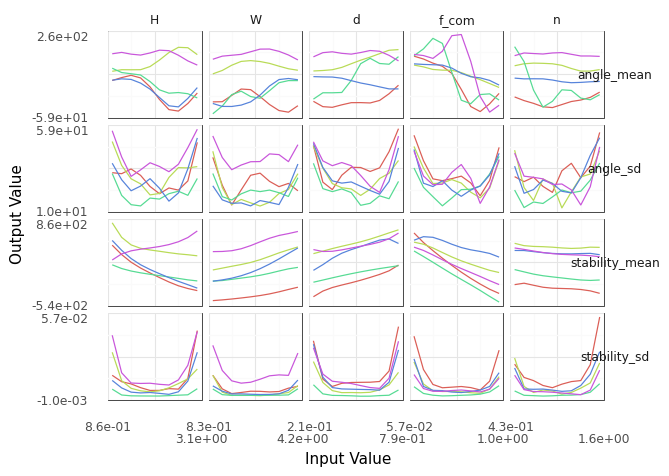

<ggplot: (8766322831312)>

In [18]:
p = (
    md_fit
    >> gr.ev_sinews(df_det="swp", n_sweeps=5)
    >> gr.pt_auto()
)
p.save("images/fit-sweep.png")
p

We see fairly monotone trends in `stability`, but far less monotone trends in `angle`. Given the accuracy 


## Dimension reduction


### Single variable


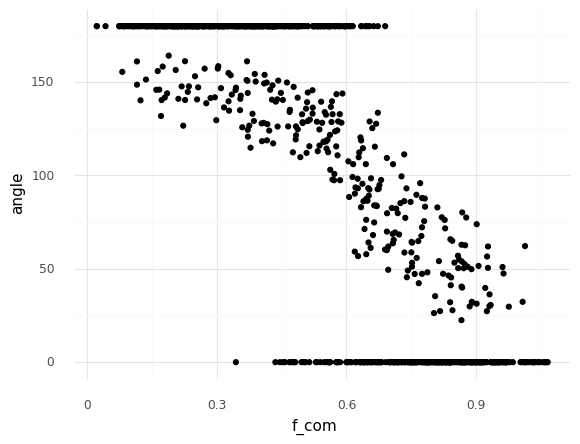

<ggplot: (8766306581640)>

In [19]:
(
    df_boats
    >> gr.ggplot(gr.aes("f_com", "angle"))
    + gr.geom_point()
    + gr.theme_minimal()
)

*Observations*

- Strong downward trend of `AVS` with `f_com`.
- `f_com` alone is not sufficient to distinguish most stable and unstable cases


### Apply variable projection

Perform a hyperparameter study for `n_degree` using k-fold CV.


... tran_kfolds is using default k=5
... tran_kfolds is using default k=5
... tran_kfolds is using default k=5
... tran_kfolds is using default k=5
... tran_kfolds is using default k=5
... tran_kfolds is using default k=5
... tran_kfolds is using default k=5


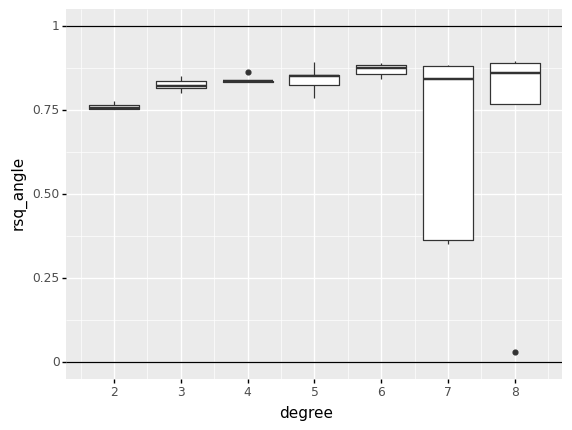

<ggplot: (8766345355831)>

In [20]:
## Sweep over n_degree
Degrees = [2, 3, 4, 5, 6, 7, 8]
df_dim = gr.df_grid()

for deg in Degrees:
    ft_varproj = gr.ft_polyridge(
        var=["d", "n", "f_com", "H", "W"],
        out="angle",
        n_degree=deg,
        n_dim=2,
    )
    
    df_tmp = (
        df_boats
        >> gr.tf_kfolds(
            ft=ft_varproj,
            out=["angle"],
            summaries=dict(rsq=gr.rsq),
        )
        >> gr.tf_mutate(degree=deg)
    )
    # Record results
    df_dim = (
        df_dim
        >> gr.tf_bind_rows(df_tmp)
    )
    
# Visualize
(
    df_dim
    >> gr.ggplot(gr.aes("degree", "rsq_angle", group="degree"))
    + gr.geom_hline(yintercept=0)
    + gr.geom_hline(yintercept=1)
    + gr.geom_boxplot()
    + gr.scale_x_continuous(breaks=range(1, 11))
)

Degree `6` has the highest median $R^2$ while still possessing low variability: This is a reasonable choice for `n_degree`.


In [21]:
df_weights = (
    df_boats
    >> gr.tf_polyridge(
        var=["d", "n", "f_com", "H", "W"],
        out="angle",
        n_degree=6,
        n_dim=2,
    )
)
df_weights[["H", "W", "n", "d", "f_com"]]

,H,W,n,d,f_com
0,-0.027733,0.039411,-0.118663,0.400932,-0.907111
1,-0.653515,0.379819,-0.015670,-0.612041,-0.231983


### Shadow plot


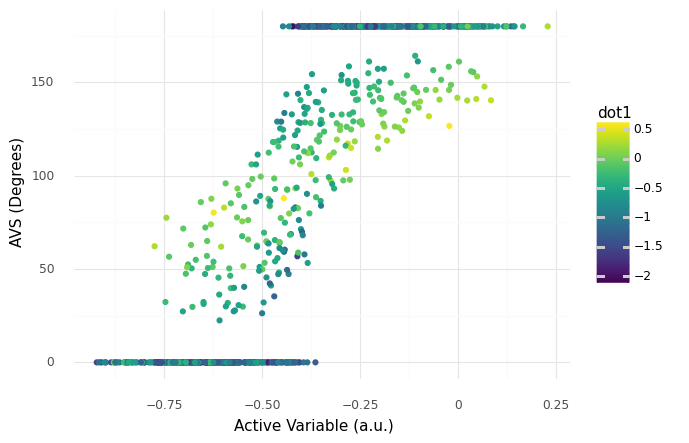

<ggplot: (8766323705104)>

In [22]:
(
    df_boats
    >> gr.tf_inner(df_weights=df_weights)
    >> gr.ggplot(gr.aes("dot0", "angle"))
    + gr.geom_point(gr.aes(color="dot1"))
    + gr.theme_minimal()
    + gr.labs(
        x="Active Variable (a.u.)",
        y="AVS (Degrees)",
    )
)

*Observations*

- Strong trend in `angle` with first active variable `dot0`
- Single active variable `dot0` is (still) insufficient to distinguish stable and unstable cases


### 2D plot


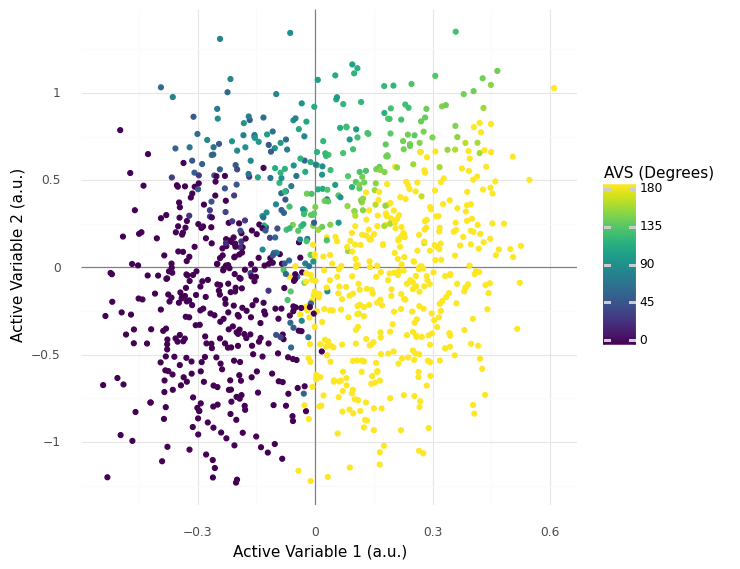

<ggplot: (8766289290469)>

In [23]:
p = (
    df_boats
    # Center the data at the mean
    >> gr.tf_mutate(
        W=DF.W - gr.mean(DF.W),
        H=DF.H - gr.mean(DF.H),
        d=DF.d - gr.mean(DF.d),
        n=DF.n - gr.mean(DF.n),
        f_com=DF.f_com - gr.mean(DF.f_com),
    )
    # Project
    >> gr.tf_inner(df_weights=df_weights)
    
    # Visualize
    >> gr.ggplot(gr.aes("dot0", "dot1"))
    + gr.geom_hline(yintercept=0, color="grey")
    + gr.geom_vline(xintercept=0, color="grey")
    + gr.geom_point(gr.aes(color="angle"))
    + gr.scale_color_continuous(
        name="AVS (Degrees)",
        limits=(0, 180), 
        breaks=(0, 45, 90, 135, 180),
    )
    + gr.theme_minimal()
    + gr.theme(aspect_ratio=1)
    + gr.labs(
        x="Active Variable 1 (a.u.)",
        y="Active Variable 2 (a.u.)",
    )
)
p.save("images/2d-projection.png")
p

*Observations*

- Two active variables `dot0` and `dot1` well-separate designs into three regions; unstable (`AVS == 0`), universally stable (`AVS == 180`), and intermediate stable (`0 < AVS < 180`)


### Identify Borderline cases


      stability   n
0  Intermediate  13
1        Stable   2
2      Unstable  34


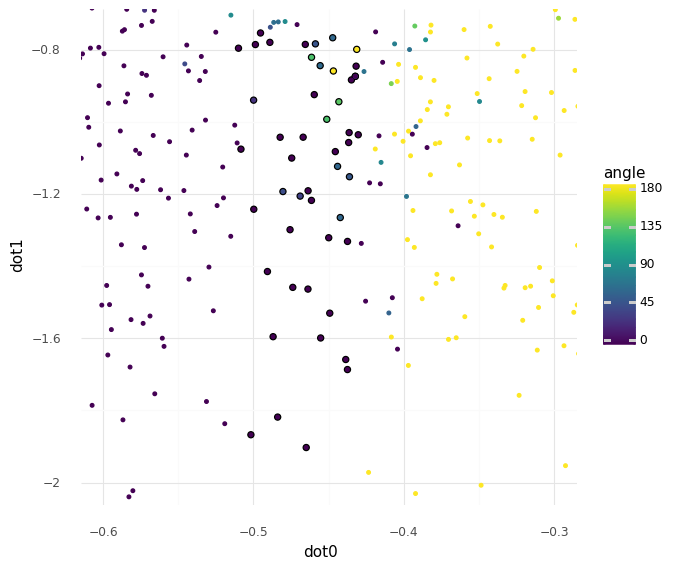

<ggplot: (8766271751111)>

In [24]:
df_borderline = (
    df_boats
    >> gr.tf_inner(df_weights=df_weights)
    >> gr.tf_mutate(
        borderline=(-0.51 <= DF.dot0) &
                   (DF.dot0 <= -0.43) &
                   (DF.dot1 <= -0.75),
        stability=gr.case_when(
            [DF.angle == 0, "Unstable"],
            [DF.angle == 180, "Stable"],
            [True, "Intermediate"],
        )
    )
)

print(
    df_borderline
    >> gr.tf_filter(DF.borderline)
    >> gr.tf_count(DF.stability)
)

(
    df_borderline
    >> gr.ggplot(gr.aes("dot0", "dot1"))
    + gr.geom_point(
        data=df_borderline
        >> gr.tf_filter(DF.borderline),
        color="black",
        size=2.0,
    )
    + gr.geom_point(gr.aes(color="angle"), size=1.0)
    + gr.scale_color_continuous(limits=(0, 180), breaks=(0, 45, 90, 135, 180))
    + gr.coord_cartesian(xlim=(-0.6, -0.3), ylim=(-2, -0.75))
    + gr.theme_minimal()
    + gr.theme(aspect_ratio=1)
)

List all borderline cases


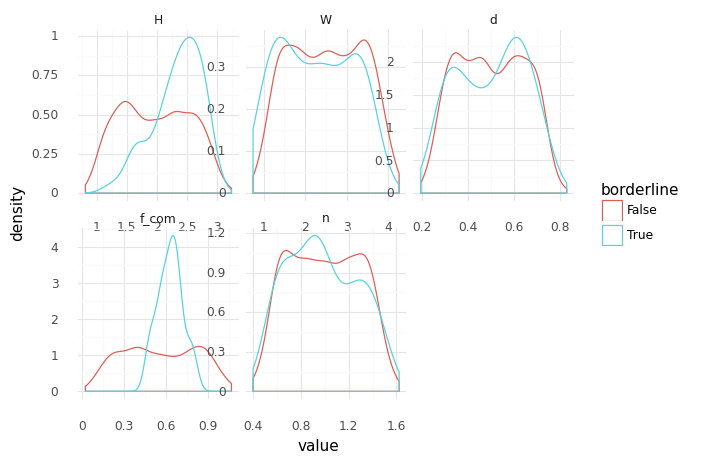

<ggplot: (8766306581559)>

In [25]:
(
    df_borderline    
    >> gr.tf_pivot_longer(
        columns=["H", "W", "d", "n", "f_com"],
        names_to="var",
        values_to="value",
    )
    
    >> gr.ggplot(gr.aes("value", color="borderline"))
    + gr.geom_density()
    + gr.facet_wrap("var", scales="free")
    + gr.theme_minimal()
)

The borderline cases are considerably more concentrated towards intermediate `f_com` values than the rest of the sample. They are also a bit more concentrated at higher `H`, lower `W`, and higher `d`.


### Visualize borderline hulls

Generate the hull shapes


In [26]:
df_hulls = pd.DataFrame()

idx_borderline = df_borderline[df_borderline.borderline].index
for idx in idx_borderline:
    # Generate hull
    values = df_borderline.iloc[idx][["H", "W", "n", "d", "f_com"]].values
    df_hull, df_mass = make_hull(values)
    # Package results
    angle = df_borderline.iloc[idx].angle
    df_tmp = (
        df_hull
        >> gr.tf_mutate(source="hull")
        >> gr.tf_bind_rows(
            df_mass
            >> gr.tf_mutate(source="COM")
        )
        >> gr.tf_mutate(idx=idx, angle=angle)
    )
    # Store results
    df_hulls = (
        df_hulls
        >> gr.tf_bind_rows(df_tmp)
    )
    
df_hulls = (
    df_hulls
    >> gr.tf_mutate(idx=gr.fct_reorder(DF.idx, DF.angle))
)    


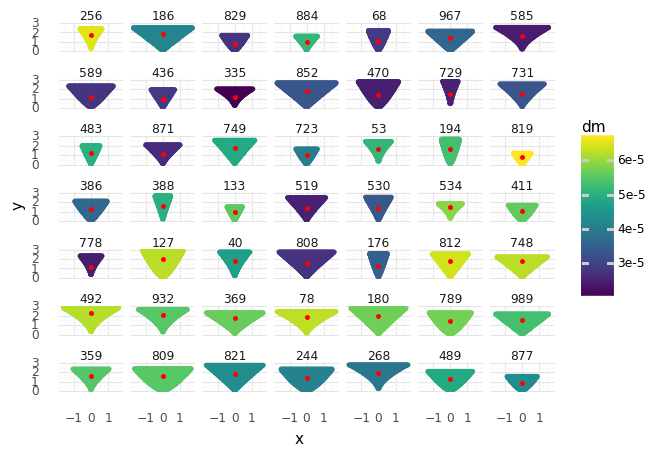

<ggplot: (8766345542003)>

In [27]:
(
    gr.ggplot(gr.aes("x", "y"))
    + gr.geom_point(
        data=df_hulls
        >> gr.tf_filter(DF.source == "hull"),
        mapping=gr.aes(color="dm"),
        size=1.0,
    )
    + gr.geom_point(
        data=df_hulls
        >> gr.tf_filter(DF.source == "COM"),
        color="red",
        size=1.0,
    )
    
    + gr.facet_wrap("idx")
    + gr.theme_minimal()
)